# 07 Removing Outlier

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('loan.csv')

In [3]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

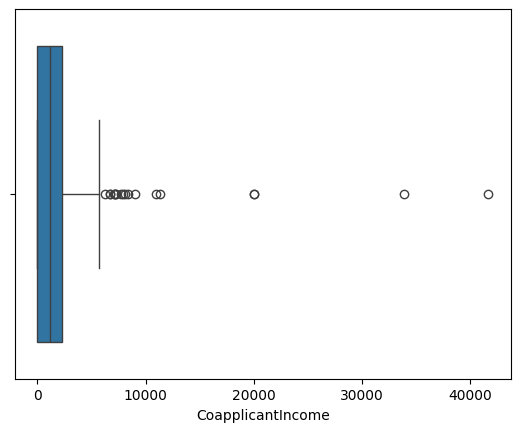

In [6]:
sns.boxplot(x = 'CoapplicantIncome', data = dataset)

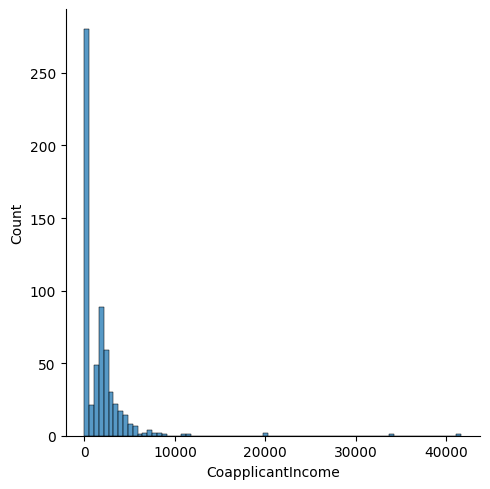

In [7]:
sns.displot(dataset['CoapplicantIncome'])

In [8]:
min_range = dataset['CoapplicantIncome'].mean() - (3 * dataset['CoapplicantIncome'].std())
max_range = dataset['CoapplicantIncome'].mean() + (3 * dataset['CoapplicantIncome'].std())
min_range, max_range  #std is the standard deviation

(-7157.4993096454655, 10399.990905699668)

In [9]:
new = dataset[dataset['CoapplicantIncome'] <= max_range]
new.shape # this is the direct method and 
#the remaining rows of the dataset shows the result is same as of z_score

(608, 13)

<Axes: xlabel='CoapplicantIncome'>

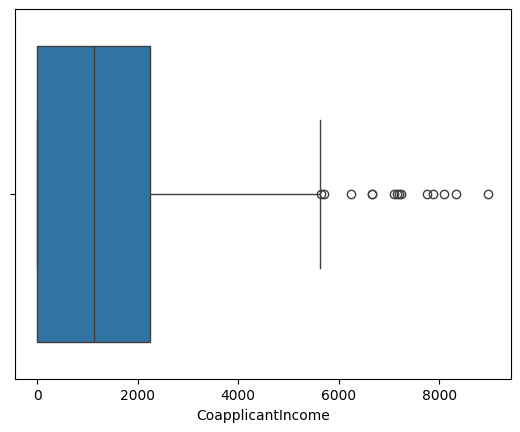

In [10]:
sns.boxplot(x='CoapplicantIncome', data = new)

In [14]:
#A z-score is a statistical measurement that shows how far a value is from the mean of a distribution in terms of standard deviations. Z-scores are also known as standard scores.
z_score = (dataset['CoapplicantIncome'] - dataset["CoapplicantIncome"].mean())/(dataset['CoapplicantIncome'].std())
z_score # z = x−μ / σ, x: Individual value μ: Mean of the dataset 

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [12]:
dataset['z_score'] = z_score
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036


In [13]:
dataset[dataset['z_score']<3].shape # |z|>3 are considered potential outliers

(608, 14)